<a href="https://colab.research.google.com/github/ParteeK26/PROJECTS/blob/main/CARDIOVASCULAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING OF LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**IMPORTING ALGORITHM**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

**UPLOADING OF FILE**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Heart_Disease_Prediction.csv to Heart_Disease_Prediction (1).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Heart_Disease_Prediction.csv']))

**INFORMATION**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

**DESCRIPTION**

In [ ]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


**CO-RELATIONAL MATRIX**

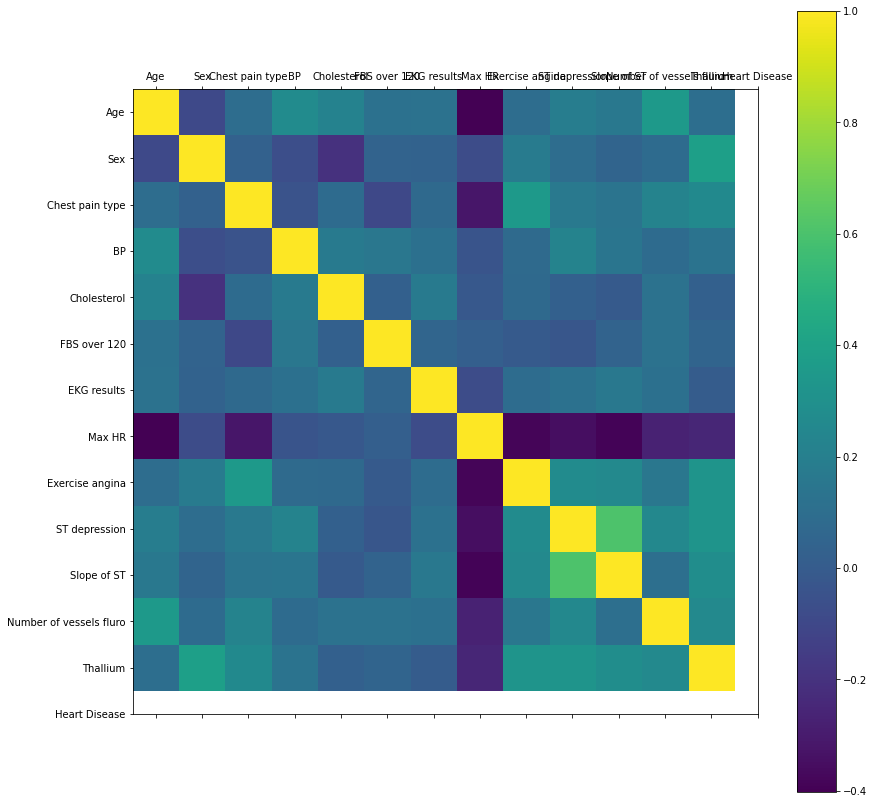

In [ ]:
rcParams['figure.figsize']=20,14
plt.matshow(df.corr())
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.xticks(np.arange(df.shape[1]), df.columns)
plt.colorbar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faa506d4b38>,
      dtype=object)

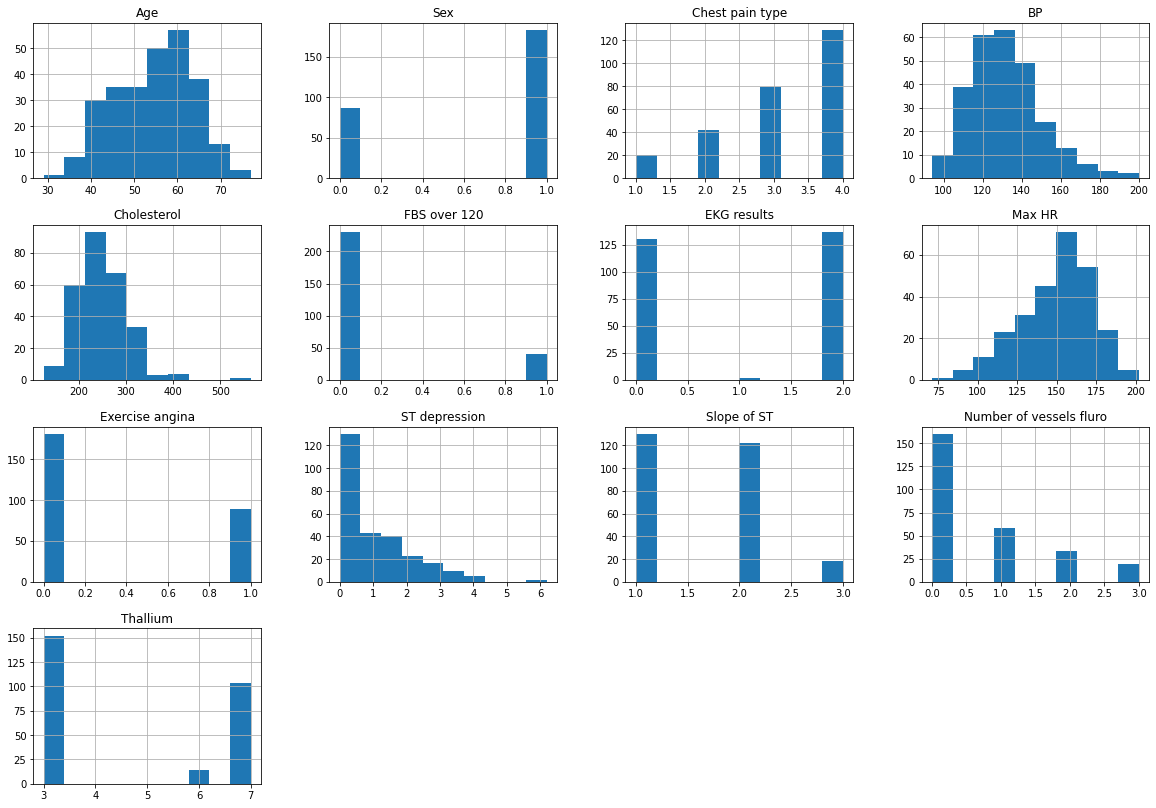

In [ ]:
df.hist()

Text(0.5, 1.0, 'Count of each Target Class')

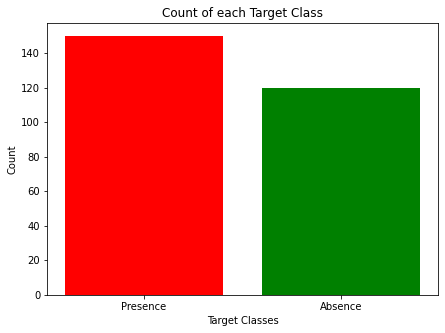

In [ ]:
rcParams['figure.figsize'] = 7,5
plt.bar(df['Heart Disease'].unique(), df['Heart Disease'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

**DATA PROCESSING**

In [ ]:
dataset = pd.get_dummies(df, columns = ['Sex','Chest pain type','FBS over 120','EKG results','Exercise angina','Slope of ST','Thallium'])

**IMPORTING TRAINING AND TEST SET**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()
coloumns_to_scale = ['Age','BP','Cholesterol','Max HR','ST depression']
dataset[coloumns_to_scale] = standardscaler.fit_transform(dataset[coloumns_to_scale])

In [ ]:
dataset.head()

,Age,BP,Cholesterol,Max HR,ST depression,Number of vessels fluro,Heart Disease,Sex_0,Sex_1,Chest pain type_1,Chest pain type_2,Chest pain type_3,Chest pain type_4,FBS over 120_0,FBS over 120_1,EKG results_0,EKG results_1,EKG results_2,Exercise angina_0,Exercise angina_1,Slope of ST_1,Slope of ST_2,Slope of ST_3,Thallium_3,Thallium_6,Thallium_7
0,1.712094,-0.075410,1.402212,-1.759208,1.181012,3,Presence,0,1,0,0,0,1,1,0,0,0,1,1,0,0,1,0,1,0,0
1,1.382140,-0.916759,6.093004,0.446409,0.481153,0,Absence,1,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,1
2,0.282294,-0.411950,0.219823,-0.375291,-0.656118,0,Presence,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1
3,1.052186,-0.187590,0.258589,-1.932198,-0.743600,1,Absence,0,1,0,0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
4,2.152032,-0.636310,0.374890,-1.240239,-0.743600,1,Absence,1,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0


**SPLITTING OF SETS**

In [ ]:
y = dataset['Heart Disease']
X = dataset.drop(['Heart Disease'], axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [ ]:
print (X_train)

          Age        BP  Cholesterol  ...  Thallium_3  Thallium_6  Thallium_7
75  -1.037521  0.597670     1.150228  ...           0           0           1
194 -0.707568 -0.411950     0.103522  ...           1           0           0
210  0.502263  2.168189     0.743175  ...           0           0           1
145 -0.157645 -0.468040     0.626875  ...           0           0           1
109 -1.037521 -1.085029    -1.737905  ...           1           0           0
..        ...       ...          ...  ...         ...         ...         ...
251 -1.147506 -0.075410    -0.594282  ...           1           0           0
192 -0.047660 -1.309389     1.150228  ...           0           0           1
117  0.172309  3.850888     0.743175  ...           0           0           1
47  -1.147506 -1.197209    -1.020718  ...           1           0           0
172  1.382140 -1.758109     0.956393  ...           1           0           0

[180 rows x 25 columns]


In [ ]:
print (y_train)

75     Presence
194     Absence
210    Presence
145    Presence
109     Absence
         ...   
251     Absence
192     Absence
117    Presence
47     Presence
172    Presence
Name: Heart Disease, Length: 180, dtype: object


In [ ]:
print (X_test) 

          Age        BP  Cholesterol  ...  Thallium_3  Thallium_6  Thallium_7
64   0.942201  0.765940    -0.322914  ...           0           1           0
135 -0.927537  0.597670    -1.408386  ...           1           0           0
153  1.052186 -0.075410     1.033927  ...           1           0           0
189  1.712094  1.607289     0.374890  ...           0           0           1
253 -0.377614 -1.197209    -1.447153  ...           1           0           0
..        ...       ...          ...  ...         ...         ...         ...
21  -0.707568 -0.075410    -0.090312  ...           1           0           0
234  0.832217 -0.075410    -0.361681  ...           0           0           1
161  0.832217  1.046389    -0.109696  ...           1           0           0
16  -0.927537  0.485490     1.188994  ...           0           0           1
118  1.272155  1.046389    -0.458598  ...           1           0           0

[90 rows x 25 columns]


In [ ]:
print (y_test)

64      Absence
135     Absence
153     Absence
189    Presence
253     Absence
         ...   
21      Absence
234     Absence
161    Presence
16     Presence
118     Absence
Name: Heart Disease, Length: 90, dtype: object


**K-NEIGHBOR CLASSIFIER**

In [ ]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
  knn_classifier =  KNeighborsClassifier(n_neighbors = k)
  score=cross_val_score(knn_classifier,X,y,cv=10)
  knn_scores.append(score.mean())

**LINE GRAPH PLOTTING**

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

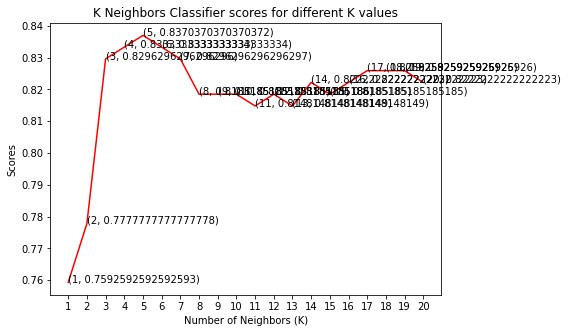

In [ ]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [ ]:
knn_classifier =KNeighborsClassifier(n_neighbors=5)
score=cross_val_score(knn_classifier,X,y,cv=10)

**MEAN VALUE**

In [ ]:
score.mean()

0.8370370370370372

**RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 1)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

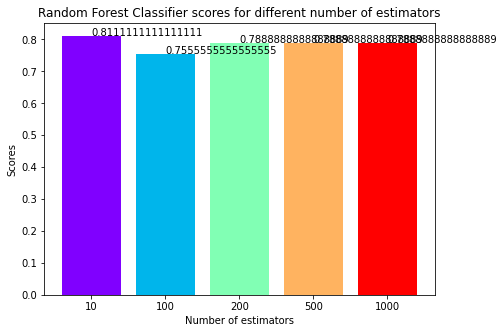

In [ ]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

In [ ]:
randomforest_classifier= RandomForestClassifier(n_estimators=10)

score=cross_val_score(randomforest_classifier,X,y,cv=10)

In [ ]:
score.mean()

0.7851851851851852

**DECISION TREE CLASSIFIER**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 1)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

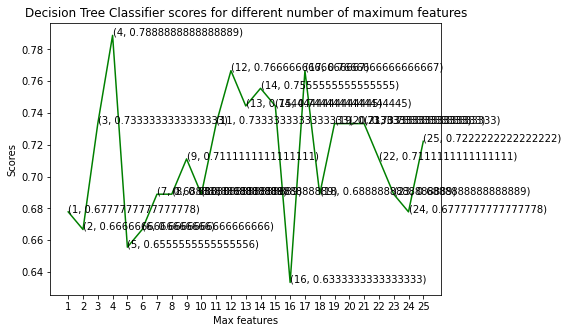

In [ ]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [ ]:
dt_classifier = DecisionTreeClassifier(max_features = 4)
score = cross_val_score(dt_classifier,X,y,cv=10)

In [ ]:
score.mean()

0.7074074074074075